# Hypothesis Testing

In [1]:
set.seed(37)

## Student's t-test

The `Student's t-test` compares the means of two samples to see if they are different. Here is a `two-sided` Student's t-test.

In [2]:
x <- rnorm(1000, mean=0, sd=1)
y <- rnorm(1000, mean=1, sd=1)

r <- t.test(x, y, alternative='two.sided')
print(r)


	Welch Two Sample t-test

data:  x and y
t = -23.159, df = 1998, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1425178 -0.9641235
sample estimates:
  mean of x   mean of y 
-0.01839959  1.03492108 



Here is a directional Student's t-test to see if the mean of `x` is greater than the mean of `y`.

In [3]:
x <- rnorm(1000, mean=0, sd=1)
y <- rnorm(1000, mean=1, sd=1)

r <- t.test(x, y, alternative='greater')
print(r)


	Welch Two Sample t-test

data:  x and y
t = -22.576, df = 1991.2, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.118479       Inf
sample estimates:
 mean of x  mean of y 
0.01325957 1.05574987 



Here is a directional Student's t-test to see if the mean of `x` is less than the mean of `y`.

In [4]:
x <- rnorm(1000, mean=0, sd=1)
y <- rnorm(1000, mean=1, sd=1)

r <- t.test(x, y, alternative='less')
print(r)


	Welch Two Sample t-test

data:  x and y
t = -22.097, df = 1996.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.9224035
sample estimates:
 mean of x  mean of y 
0.01069279 1.00731729 



We may also perform a `one-sample` Student's t-test.

In [5]:
x <- rnorm(1000, mean=0, sd=1)

r <- t.test(x, mu=5)
print(r)


	One Sample t-test

data:  x
t = -159.87, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 5
95 percent confidence interval:
 -0.13452024 -0.01000024
sample estimates:
  mean of x 
-0.07226024 



If your data is in long format, you may use a formula to perform a Student's t-test.

In [6]:
data <- data.frame(
    score = c(90, 89, 70, 99, 100, 77, 80, 67, 70),
    gender = c(rep('girl', 5), rep('boy', 4))
)

r <- t.test(score ~ gender, data=data)
print(r)


	Welch Two Sample t-test

data:  score by gender
t = -2.6069, df = 6.0971, p-value = 0.0397
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -31.15404  -1.04596
sample estimates:
 mean in group boy mean in group girl 
              73.5               89.6 



## Wilcoxon U-Test

The `Wilcoxon U-Test` is non-parametric test used to compare two samples. The function `wilcox.text` behaves the same way as the `t.test` function.

In [7]:
x <- rnorm(1000, mean=0, sd=1)
y <- rnorm(1000, mean=0.5, sd=1)

r <- wilcox.test(x, y)
print(r)


	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 339274, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



## Correlation

May also compute correlation and test the it as well.

In [8]:
x <- seq(1, 1000)
y <- x * 2 + rnorm(1000, mean=5, sd=5)

c <- cor(x, y)
print(c)

[1] 0.9999633


We compute the covariance with the `cov` function.`

In [9]:
x <- seq(1, 1000)
y <- x * 2 + rnorm(1000, mean=5, sd=5)

c <- cov(x, y)
print(c)

[1] 166818.4


We compute the significance with `cor.test`.

In [10]:
x <- seq(1, 1000)
y <- x * 2 + rnorm(1000, mean=5, sd=5)

r <- cor.test(x, y)
print(r)


	Pearson's product-moment correlation

data:  x and y
t = 3806.6, df = 998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9999610 0.9999696
sample estimates:
      cor 
0.9999656 



## Chi-squared test

A `Chi-squared` test is used to test for association with contigency tables.

In [11]:
df <- data.frame(
    rural = c(10, 15, 12),
    urban = c(20, 30, 25),
    row.names=c('DC', 'MD', 'VA')
)

r <- chisq.test(df)
print(r)


	Pearson's Chi-squared test

data:  df
X-squared = 0.0090902, df = 2, p-value = 0.9955



A `goodness of fit` test using the `Chi-squared test` is performed as follows.

In [12]:
df <- data.frame(
    rural = c(10, 15, 12),
    urban = c(20, 30, 25),
    row.names=c('DC', 'MD', 'VA')
)

r <- chisq.test(df$rural, p=df$urban, rescale.p=TRUE)
print(r)


	Chi-squared test for given probabilities

data:  df$rural
X-squared = 0.013514, df = 2, p-value = 0.9933



## Analysis of variance

### One-way analysis of variance
A one-way `analysis of variance` (`AOV`) may be conducted as follows.

In [13]:
library(tidyr)

df <- data.frame(
    city = c('A', 'B', 'C', 'D', 'E'),
    urban = c(20, 25, 22, 24, 21),
    rural = c(10, 15, 12, 14, 11),
    suburb = c(15, 18, 19, 20, 17)
)

df <- df %>% pivot_longer(-city, names_to='location', values_to='expense')
r <- aov(expense ~ location, data=df)
print(r)
print('-- summary below --')
print(summary(r))

Call:
   aov(formula = expense ~ location, data = df)

Terms:
                location Residuals
Sum of Squares  250.5333   49.2000
Deg. of Freedom        2        12

Residual standard error: 2.024846
Estimated effects may be unbalanced
[1] "-- summary below --"
            Df Sum Sq Mean Sq F value   Pr(>F)    
location     2  250.5   125.3   30.55 1.96e-05 ***
Residuals   12   49.2     4.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Post-hoc test

We apply `Tukey's Honestly Significant Difference` (`HSD`) test to see which pairs differ.

In [14]:
t <- TukeyHSD(r)
print(t)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = expense ~ location, data = df)

$location
             diff      lwr       upr     p adj
suburb-rural  5.4 1.983468  8.816532 0.0031673
urban-rural  10.0 6.583468 13.416532 0.0000133
urban-suburb  4.6 1.183468  8.016532 0.0095794



#### Obtaining the effects

In [15]:
e <- model.tables(r, type='effects')
print(e)

Tables of effects

 location 
location
 rural suburb  urban 
-5.133  0.267  4.867 


#### Obtaining the means

In [16]:
m <- model.tables(r, type='means')
print(m)

Tables of means
Grand mean
         
17.53333 

 location 
location
 rural suburb  urban 
  12.4   17.8   22.4 


#### Visualizing the means

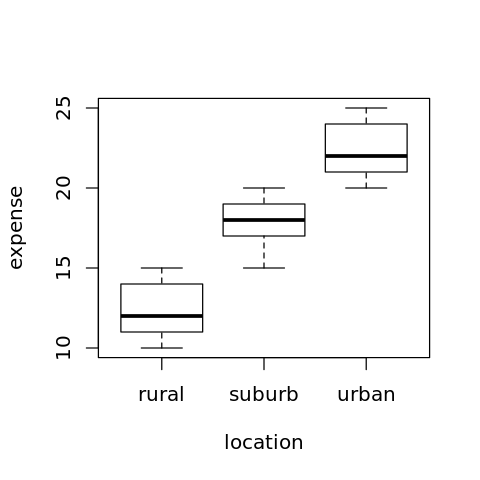

In [17]:
options(repr.plot.width=4, repr.plot.height=4)

boxplot(expense ~ location, data=df)

#### Visualizing the differences

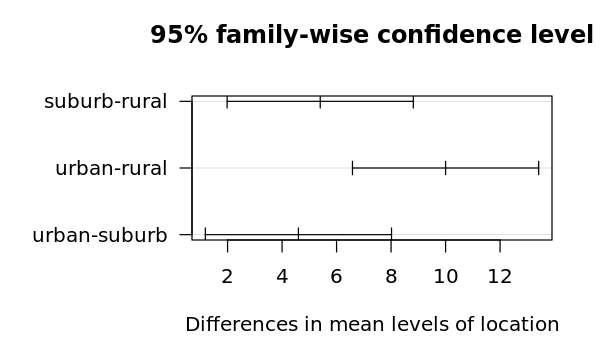

In [18]:
options(repr.plot.width=5, repr.plot.height=3)

op = par(mar = c(5, 8, 4, 2))
plot(t, cex=0.2, las=1)
par(op)

### Two-way ANOVA

In [19]:
suppressMessages({
    library('dplyr')
})

N = 5
a <- 5 + 20 * rnorm(N, mean=20, sd=1) + 4 * rnorm(N, mean=4, sd=1) # urban-high
b <- 5 + 18 * rnorm(N, mean=18, sd=1) + 2 * rnorm(N, mean=2, sd=1) # urban-low
c <- 5 + 10 * rnorm(N, mean=10, sd=1) + 4 * rnorm(N, mean=4, sd=1) # suburban-high
d <- 5 + 8 * rnorm(N, mean=8, sd=1) + 2 * rnorm(N, mean=2, sd=1) # suburban-low
e <- 5 + 5 * rnorm(N, mean=5, sd=1) + 4 * rnorm(N, mean=4, sd=1) # rural-high
f <- 5 + 3 * rnorm(N, mean=3, sd=1) + 2 * rnorm(N, mean=2, sd=1) # rural-low

df <- data.frame(
    expense=c(a, b, c, d, e, f), 
    location=c(rep('urban', 2*N), rep('suburban', 2*N), rep('rural', 2*N)), 
    income=c(rep('high', N), rep('low', N), rep('high', N), rep('low', N), rep('high', N), rep('low', N)),
    stringsAsFactors=TRUE
)

In [20]:
r <- aov(expense ~ location * income, data=df)

print(r)
print('-- summary below --')
print(summary(r))

Call:
   aov(formula = expense ~ location * income, data = df)

Terms:
                location   income location:income Residuals
Sum of Squares  687822.6  24346.4          4833.1    7098.1
Deg. of Freedom        2        1               2        24

Residual standard error: 17.19753
Estimated effects may be unbalanced
[1] "-- summary below --"
                Df Sum Sq Mean Sq  F value   Pr(>F)    
location         2 687823  343911 1162.825  < 2e-16 ***
income           1  24346   24346   82.319 3.17e-09 ***
location:income  2   4833    2417    8.171  0.00197 ** 
Residuals       24   7098     296                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Two-Way ANOVA post-hoc

In [21]:
t <- TukeyHSD(r)
print(t)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = expense ~ location * income, data = df)

$location
                    diff       lwr       upr p adj
suburban-rural  60.83863  41.63207  80.04519 1e-07
urban-rural    347.27478 328.06822 366.48134 0e+00
urban-suburban 286.43615 267.22959 305.64271 0e+00

$income
              diff       lwr       upr p adj
low-high -56.97529 -69.93585 -44.01473     0

$`location:income`
                                 diff        lwr         upr     p adj
suburban:high-rural:high     69.64827   36.01835  103.278196 0.0000173
urban:high-rural:high       377.50133  343.87140  411.131254 0.0000000
rural:low-rural:high        -30.95116  -64.58109    2.678762 0.0837968
suburban:low-rural:high      21.07783  -12.55210   54.707751 0.4049037
urban:low-rural:high        286.09707  252.46714  319.726994 0.0000000
urban:high-suburban:high    307.85306  274.22313  341.482983 0.0000000
rural:low-suburban:high    -100.59

#### Two-Way ANOVA effects

In [22]:
e <- model.tables(r, type='effects')
print(e)

Tables of effects

 location 
location
   rural suburban    urban 
 -136.04   -75.20   211.24 

 income 
income
   high     low 
 28.488 -28.488 

 location:income 
          income
location   high    low    
  rural    -13.012  13.012
  suburban  -4.202   4.202
  urban     17.214 -17.214


#### Two-Way ANOVA means

In [23]:
m <- model.tables(r, type='means')
print(m)

Tables of means
Grand mean
         
168.0042 

 location 
location
   rural suburban    urban 
    32.0     92.8    379.2 

 income 
income
  high    low 
196.49 139.52 

 location:income 
          income
location   high  low  
  rural     47.4  16.5
  suburban 117.1  68.5
  urban    424.9 333.5


#### Two-Way ANOVA means visualization

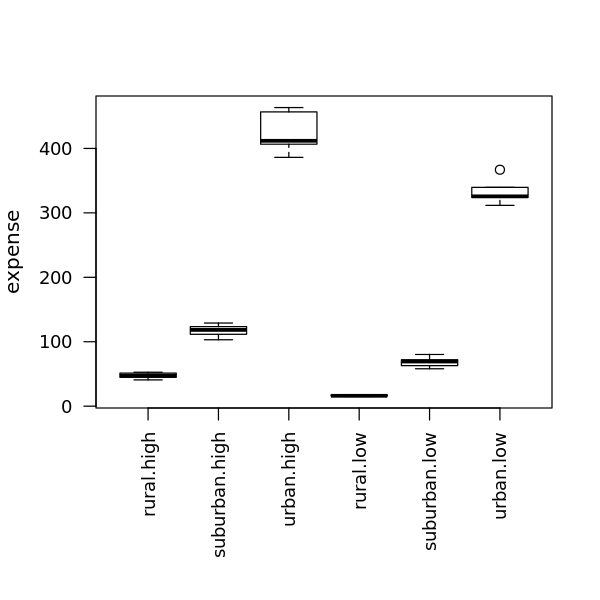

In [24]:
options(repr.plot.width=5, repr.plot.height=5)

op = par(mar = c(8, 4, 4, 2))
boxplot(expense ~ location * income, data = df, cex.axis = 0.9, las=2, xlab='')
par(op)

#### Two-Way ANOVA differences visualization

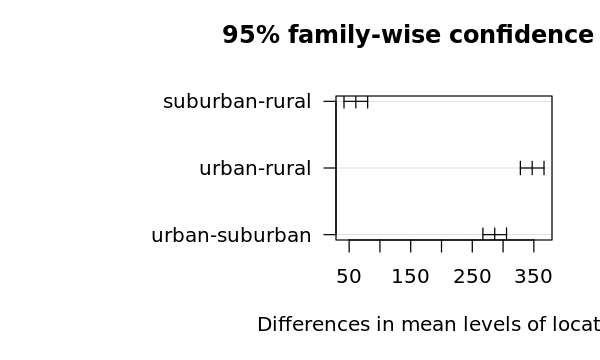

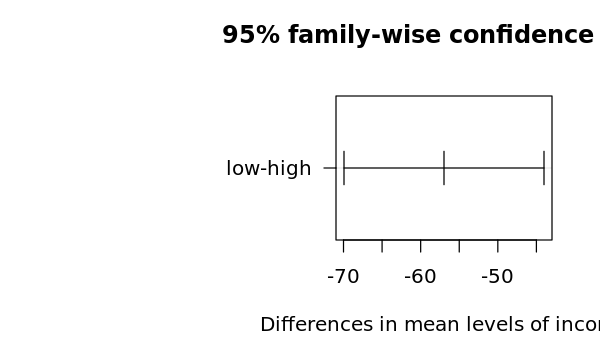

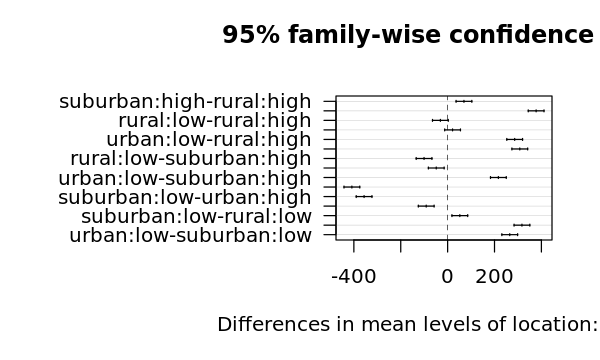

In [25]:
options(repr.plot.width=5, repr.plot.height=3)

op = par(mar = c(5, 14, 4, 2))
plot(t, cex=0.2, las=1)
par(op)

#### Two-Way ANOVA interaction plot

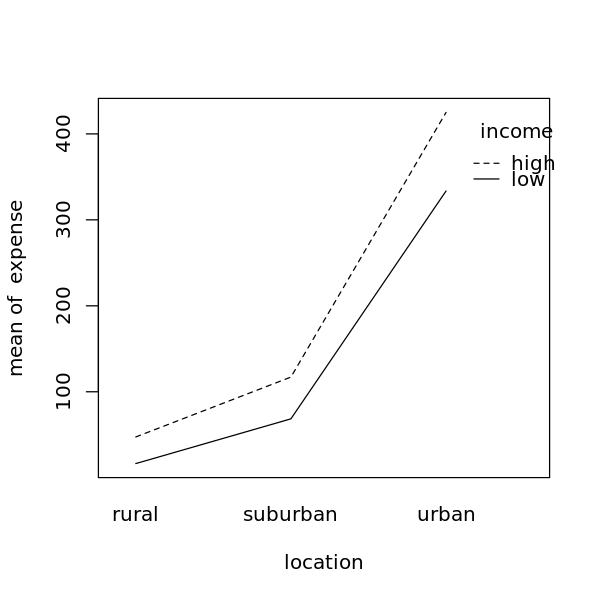

In [26]:
options(repr.plot.width=5, repr.plot.height=5)

attach(df)
interaction.plot(location, income, expense)
detach(df)